# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:


# read the csv file
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

# print the first 5 rows of the data set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Analizamos las variables categoricas

In [6]:
# Analisamos las variables categoricas
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
sex_dic={'male':1,'female':0}
df['sex']=df['sex'].map(sex_dic)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [8]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
smoker_dic={'yes':1,'no':0}
df['smoker']=df['smoker'].map(smoker_dic)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
region_dic={'southeast':0,'southwest':1,'northwest':2,'northeast':3}
df['region']=df['region'].map(region_dic)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


<AxesSubplot:>

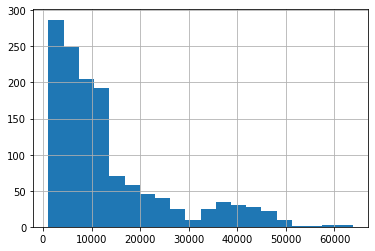

In [12]:
# Analizar los datos numericos, donde el target es lo mas importante
# Si tienen una buena distribucion podemos hacer una regresion lineal simple
# Podemos hacer una grafica de la distribucion
df['charges'].hist(bins=20)

<AxesSubplot:>

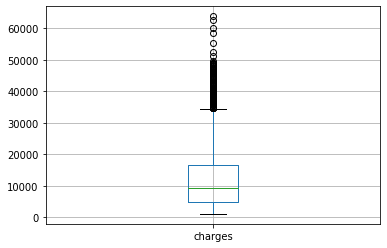

In [13]:
# Podemos ver el boxplot

df.boxplot(column='charges')

In [14]:
df['charges_log'] = np.log10(df['charges']+10**(-6))
df

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,0,27.900,0,1,1,16884.92400,4.227499
1,18,1,33.770,1,0,0,1725.55230,3.236928
2,28,1,33.000,3,0,0,4449.46200,3.648308
3,33,1,22.705,0,0,2,21984.47061,4.342116
4,32,1,28.880,0,0,2,3866.85520,3.587358
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,4.025328
1334,18,0,31.920,0,0,3,2205.98080,3.343602
1335,18,0,36.850,0,0,0,1629.83350,3.212143
1336,21,0,25.800,0,0,1,2007.94500,3.302752


<AxesSubplot:>

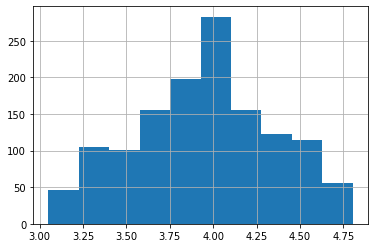

In [15]:
df['charges_log'].hist()
# Para sacar la métrica real del error tendríamos que realizar la inversa de la transformación.


In [25]:
#df['charges']>30000.value_counts()

SyntaxError: invalid syntax (1751613636.py, line 1)

In [38]:
df['charges_log']=np.log10(df['charges'])
df

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,0,27.900,0,1,1,16884.92400,4.227499
1,18,1,33.770,1,0,0,1725.55230,3.236928
2,28,1,33.000,3,0,0,4449.46200,3.648308
3,33,1,22.705,0,0,2,21984.47061,4.342116
4,32,1,28.880,0,0,2,3866.85520,3.587358
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,4.025328
1334,18,0,31.920,0,0,3,2205.98080,3.343602
1335,18,0,36.850,0,0,0,1629.83350,3.212143
1336,21,0,25.800,0,0,1,2007.94500,3.302752


<AxesSubplot:>

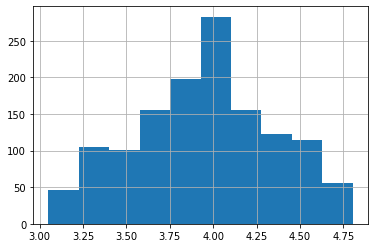

In [42]:
df['charges_log'].hist()
# Para sacar la metrica real del error tendriamos que realizar la inversa de la transformacion

In [ ]:
# En la regresion no se pueden borrar esos outliders
# La metrica en la regresion no nos permite



<AxesSubplot:>

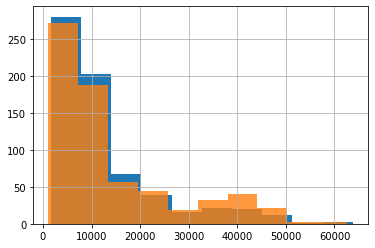

In [46]:
# histograma por sexo para ver a quien le cobran mas segun el sexo
df['charges'][df['sex']==0].hist()
df['charges'][df['sex']==1].hist(alpha=0.8)

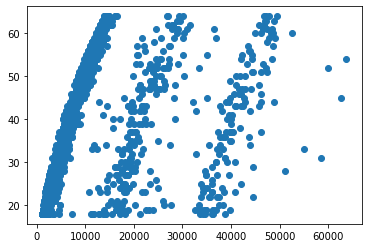

In [48]:
plt.plot(df['charges'],df['age'],'o')

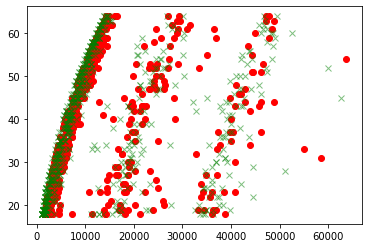

In [51]:
plt.plot(df['charges'][df['sex']==0],df['age'][df['sex']==0],'ro')
plt.plot(df['charges'][df['sex']==1],df['age'][df['sex']==1],'gx',alpha=0.5)

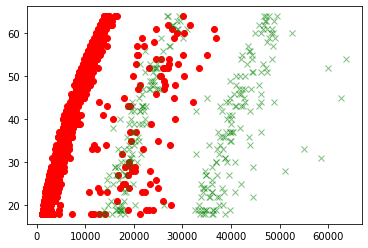

<AxesSubplot:>

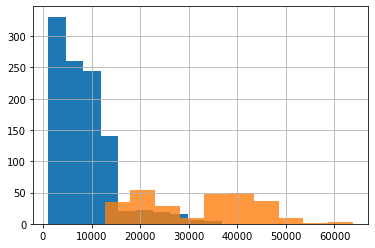

In [53]:
df['charges'][df['smoker']==0].hist()
df['charges'][df['smoker']==1].hist(alpha=0.8)

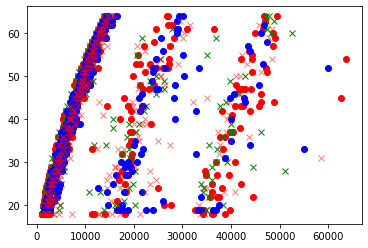

In [60]:
plt.plot(df['charges'][df['region']==0],df['age'][df['region']==0],'ro')
plt.plot(df['charges'][df['region']==1],df['age'][df['region']==1],'gx')
plt.plot(df['charges'][df['region']==2],df['age'][df['region']==2],'bo')
plt.plot(df['charges'][df['region']==3],df['age'][df['region']==3],'rx',alpha=0.5)

Los fumadores son los que pagan mas
Parece haber tres tipos de seguros o categorias
En relacion de la region no hay cambios significativos

In [ ]:
# Dividir en 3 grupos los datos
# Lo hacemos en 80, 10  10

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Para saber los parametros, buscar en google sino
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estim

Los fumadores siempre pagan más. Parecería haber tres "tipos" de seguros. No parecería existir relación con la región.

Probando variable charges sin transformación:

In [16]:
X=df.drop(columns=['charges','charges_log'])
y=df['charges']

In [17]:
X_train,X_test_aux,y_train, y_test_aux=train_test_split(X,y,test_size=0.3,random_state=412)
print(X_train.shape,y_train.shape)
print(X_test_aux.shape,y_test_aux.shape)


(936, 6) (936,)
(402, 6) (402,)


In [18]:
X_val,X_test,y_val,y_test=train_test_split(X_test_aux,y_test_aux,test_size=0.5,random_state=142)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)



(936, 6) (936,)
(201, 6) (201,)
(201, 6) (201,)


In [19]:
mi_modelo=LinearRegression()

In [20]:
mi_modelo.fit(X_train,y_train)

LinearRegression()

In [21]:
y_val_pred=mi_modelo.predict(X_val)
y_train_pred=mi_modelo.predict(X_train)

In [22]:
RMSE_train=mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_val=mean_squared_error(y_val, y_val_pred, squared=False)
print('train :', RMSE_train, 'validation:', RMSE_val)

train : 6083.057967421364 validation: 6236.954250445496
